In [323]:
import pandas as pd
import nltk as tm
from nltk.corpus import stopwords
import wordcloud
import matplotlib as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [324]:
import matplotlib.pyplot as plt

In [325]:
pwd

'c:\\Users\\Stenh\\OneDrive - Uppsala universitet\\Termin 4\\Examensarbete_analys'

<h1>Inläsning, transformering och kontroll av data</h1>

In [326]:

df = pd.read_csv("138svar.csv", encoding="utf-8", delimiter = ",")

In [327]:
# df = df.drop(df.index[:3])
# df = df.reset_index(drop=True)

In [328]:
df.drop(columns="Tidstämpel", axis=1, inplace=True)

In [329]:
kolumner_att_konvertera = df.columns[:4]

# Konvertera datatypen för de valda kolumnerna till 'category'
df[kolumner_att_konvertera] = df[kolumner_att_konvertera].astype('category')


In [330]:
df['Hur många invånare har orten där du bor?'] = df['Hur många invånare har orten där du bor?'].replace({
    "0-10 000": "liten",
    "10-50 000": "liten",
    "50-100 000": "medel",
    "100-200 000": "stor",
    "200 000+": "stor"
})

C:\Users\Stenh\AppData\Local\Temp\ipykernel_12300\2101176683.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Hur många invånare har orten där du bor?'] = df['Hur många invånare har orten där du bor?'].replace({


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 41 columns):
 #   Column                                                                                                              Non-Null Count  Dtype   
---  ------                                                                                                              --------------  -----   
 0   Kön                                                                                                                 133 non-null    category
 1   Vilken årskurs går du i?                                                                                            133 non-null    category
 2   Vilket av följande beskriver bäst ditt program?                                                                     133 non-null    category
 3   Hur många invånare har orten där du bor?                                                                            133 non-null    category
 4   Jag känner til

In [332]:
df.head()

,Kön,Vilken årskurs går du i?,Vilket av följande beskriver bäst ditt program?,Hur många invånare har orten där du bor?,Jag känner till GDPR.,Jag litar på att hemsidor hanterar mina personuppgifter på ett ansvarsfullt sätt.,"Jag väljer ""Godkänn alla cookies"".","Jag väljer ""Tillåt alla"".","Jag väljer ""Acceptera alla cookies"".","Jag väljer ""Acceptera alla cookies"". .1",...,Jag är omsorgsfull med vilka uppgifter jag lämnar till hemsidor.,Jag bryr mig om att företag samlar in information om mig som person.,Jag bryr mig om att företag samlar in information om mitt beteende online.,Jag känner oro över att information som samlas in via cookies kan användas på ett felaktigt sätt.,Jag känner mig obekväm med att webbplatser spårar mitt beteende med hjälp av cookies.,När jag besöker en hemsida tycker att det är viktigt att jag får välja vilken information om mig som lagras.,Jag tycker att hemsidor bör förklara tydligt vad varje cookie används till.,Jag tycker att det är fel att samla in personuppgifter utan att informera användaren.,Jag tycker att företag inskränker på människors privatliv när de spårar aktivitet via cookies.,Jag tycker att det är rimligt att betala med personlig data istället för pengar för att använda tjänster online.
0,Man,Årskurs 3,Naturvetenskap,medel,5,5,7,7,3,7,...,2,6,6,5,5,6,7,7,6,2
1,Man,Årskurs 3,Samhällsvetenskap,medel,1,7,7,7,5,7,...,3,6,5,5,2,5,5,5,6,5
2,Kvinna,Årskurs 3,Naturvetenskap,liten,5,4,7,7,7,7,...,7,6,5,5,6,5,7,7,7,6
3,Kvinna,Årskurs 3,Samhällsvetenskap,liten,5,3,7,7,7,7,...,3,5,5,3,3,4,7,7,4,3
4,Kvinna,Årskurs 3,Naturvetenskap,liten,6,6,5,7,6,7,...,5,4,4,4,4,4,5,6,4,4


In [333]:
kolumner_att_ändra = df.columns[[6, 7, 8, 9, 10, 40]]

df[kolumner_att_ändra] = df[kolumner_att_ändra].replace({
    7: 1,
    6: 2,
    5: 3,
    3: 5,
    2: 6,
    7: 1
})

In [334]:
print(kolumner_att_ändra)

Index(['Jag väljer "Godkänn alla cookies".', 'Jag väljer "Tillåt alla". ',
       'Jag väljer "Acceptera alla cookies". ',
       'Jag väljer "Acceptera alla cookies". .1',
       'Jag väljer "Tillåt alla". .1',
       'Jag tycker att det är rimligt att betala med personlig data istället för pengar för att använda tjänster online. '],
      dtype='object')


In [335]:
df.head()

,Kön,Vilken årskurs går du i?,Vilket av följande beskriver bäst ditt program?,Hur många invånare har orten där du bor?,Jag känner till GDPR.,Jag litar på att hemsidor hanterar mina personuppgifter på ett ansvarsfullt sätt.,"Jag väljer ""Godkänn alla cookies"".","Jag väljer ""Tillåt alla"".","Jag väljer ""Acceptera alla cookies"".","Jag väljer ""Acceptera alla cookies"". .1",...,Jag är omsorgsfull med vilka uppgifter jag lämnar till hemsidor.,Jag bryr mig om att företag samlar in information om mig som person.,Jag bryr mig om att företag samlar in information om mitt beteende online.,Jag känner oro över att information som samlas in via cookies kan användas på ett felaktigt sätt.,Jag känner mig obekväm med att webbplatser spårar mitt beteende med hjälp av cookies.,När jag besöker en hemsida tycker att det är viktigt att jag får välja vilken information om mig som lagras.,Jag tycker att hemsidor bör förklara tydligt vad varje cookie används till.,Jag tycker att det är fel att samla in personuppgifter utan att informera användaren.,Jag tycker att företag inskränker på människors privatliv när de spårar aktivitet via cookies.,Jag tycker att det är rimligt att betala med personlig data istället för pengar för att använda tjänster online.
0,Man,Årskurs 3,Naturvetenskap,medel,5,5,1,1,5,1,...,2,6,6,5,5,6,7,7,6,6
1,Man,Årskurs 3,Samhällsvetenskap,medel,1,7,1,1,3,1,...,3,6,5,5,2,5,5,5,6,3
2,Kvinna,Årskurs 3,Naturvetenskap,liten,5,4,1,1,1,1,...,7,6,5,5,6,5,7,7,7,2
3,Kvinna,Årskurs 3,Samhällsvetenskap,liten,5,3,1,1,1,1,...,3,5,5,3,3,4,7,7,4,5
4,Kvinna,Årskurs 3,Naturvetenskap,liten,6,6,3,1,2,1,...,5,4,4,4,4,4,5,6,4,4


<h1>Kategorisering</h1>

In [336]:
df_demografi = df.iloc[:,:6]

In [337]:
# Välj kolumnerna med index 19 till 27 (slutet är exklusivt så vi tar upp till 28)
utvalda_k = df.iloc[:, 17:29]
utvalda_k1 = df.iloc[:, 17:23]
utvalda_k2 = df.iloc[:, 23:29]
utvalda_a = df.iloc[:, 29:]
utvalda_a1 = df.iloc[:, 29:37]
utvalda_a2 = df.iloc[:, 37:]
utvalda_b = df.iloc[:, 6:17]
utvalda_b1_dark = df.iloc[:,[6,7,9]]
utvalda_b1_no_dark = df.iloc[:,[8,10]]
utvalda_b2 = df.iloc[:, 11:14]
utvalda_b3 = df.iloc[:, 14:17]


# Platta ut alla värden till en lång array och räkna ut medelvärde
medelvärde_k = utvalda_k.values.flatten().mean()
medelvärde_k1 = utvalda_k1.values.flatten().mean()
medelvärde_k2 = utvalda_k2.values.flatten().mean()
medelvärde_a = utvalda_a.values.flatten().mean()
medelvärde_a1 = utvalda_a1.values.flatten().mean()
medelvärde_a2 = utvalda_a2.values.flatten().mean()
medelvärde_b = utvalda_b.values.flatten().mean()
medelvärde_b1_dark = utvalda_b1_dark.values.flatten().mean()
medelvärde_b1_no_dark = utvalda_b1_no_dark.values.flatten().mean()
medelvärde_b2 = utvalda_b2.values.flatten().mean()
medelvärde_b3 = utvalda_b3.values.flatten().mean()

# Skapa ny DataFrame med en kolumn "K" och medelvärdet som enda värde
df_kategoriserad = pd.DataFrame({
                      'K': [medelvärde_k],
                      'K_grundläggande': [medelvärde_k1],
                      'K_integritet': [medelvärde_k2],
                      'A': [medelvärde_a],
                      'A_egen_data': [medelvärde_a1],
                      'A_gen_insamling': [medelvärde_a2],
                      'B': [medelvärde_b],
                      'B_bilder_dark': [medelvärde_b1_dark],
                      'B_bilder_no_dark': [medelvärde_b1_no_dark],
                      'B2_agerande': [medelvärde_b2],
                      'B3_aktivt agerande': [medelvärde_b3]
                      })

In [338]:
df_kategoriserad.head()

,K,K_grundläggande,K_integritet,A,A_egen_data,A_gen_insamling,B,B_bilder_dark,B_bilder_no_dark,B2_agerande,B3_aktivt agerande
0,3.711153,3.552632,3.869674,4.224937,4.084586,4.505639,2.343814,1.859649,2.161654,2.897243,2.39599


In [339]:

medel_k = df.iloc[:, 17:29].mean(axis=1).round(2)
medel_k1 = df.iloc[:, 17:23].mean(axis=1)
medel_k2 = df.iloc[:, 23:29].mean(axis=1)
medel_a = df.iloc[:, 29:].mean(axis=1)
medel_a1 = df.iloc[:, 29:37].mean(axis=1)
medel_a2 = df.iloc[:, 37:].mean(axis=1)
medel_b = df.iloc[:, 6:17].mean(axis=1)
medel_b1_dark = df.iloc[:,[6,7,9]].mean(axis=1)
medel_b1_no_dark = df.iloc[:,[8,10]].mean(axis=1)
medel_b2 = df.iloc[:, 11:14].mean(axis=1)
medel_b3 = df.iloc[:, 14:17].mean(axis=1)


df_resp_sum = pd.DataFrame({
                      'Kön': df.iloc[:,0],
                      'Årskurs': df.iloc[:,1],
                      'Program': df.iloc[:,2],
                      'Invånare': df.iloc[:,3],
                      'K': medel_k,
                      'K_grundläggande': medel_k1,
                      'K_integritet': medel_k2,
                      'A': medel_a,
                      'A_egen_data': medel_a1,
                      'A_gen_insamling': medel_a2,
                      'B': medel_b,
                      'B_bilder_dark': medel_b1_dark,
                      'B_bilder_no_dark': medel_b1_no_dark,
                      'B2_agerande': medel_b2,
                      'B3_aktivt agerande': medel_b3
                      })

In [340]:
df_resp_sum.head()

,Kön,Årskurs,Program,Invånare,K,K_grundläggande,K_integritet,A,A_egen_data,A_gen_insamling,B,B_bilder_dark,B_bilder_no_dark,B2_agerande,B3_aktivt agerande
0,Man,Årskurs 3,Naturvetenskap,medel,3.25,1.833333,4.666667,5.833333,5.500,6.50,2.181818,1.000000,3.5,3.666667,1.0
1,Man,Årskurs 3,Samhällsvetenskap,medel,1.58,2.166667,1.000000,4.666667,4.625,4.75,1.545455,1.000000,2.0,2.333333,1.0
2,Kvinna,Årskurs 3,Naturvetenskap,liten,1.67,2.333333,1.000000,5.916667,6.000,5.75,1.363636,1.000000,1.0,2.333333,1.0
3,Kvinna,Årskurs 3,Samhällsvetenskap,liten,2.33,1.166667,3.500000,4.833333,4.375,5.75,1.000000,1.000000,1.0,1.000000,1.0
4,Kvinna,Årskurs 3,Naturvetenskap,liten,5.08,4.666667,5.500000,4.416667,4.250,4.75,2.727273,1.666667,2.0,4.000000,3.0


<h1>Demografi</h1>

In [341]:
df_demografi.head()

,Kön,Vilken årskurs går du i?,Vilket av följande beskriver bäst ditt program?,Hur många invånare har orten där du bor?,Jag känner till GDPR.,Jag litar på att hemsidor hanterar mina personuppgifter på ett ansvarsfullt sätt.
0,Man,Årskurs 3,Naturvetenskap,medel,5,5
1,Man,Årskurs 3,Samhällsvetenskap,medel,1,7
2,Kvinna,Årskurs 3,Naturvetenskap,liten,5,4
3,Kvinna,Årskurs 3,Samhällsvetenskap,liten,5,3
4,Kvinna,Årskurs 3,Naturvetenskap,liten,6,6


<module 'matplotlib.pyplot' from 'C:\\Users\\Stenh\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python313\\site-packages\\matplotlib\\pyplot.py'>

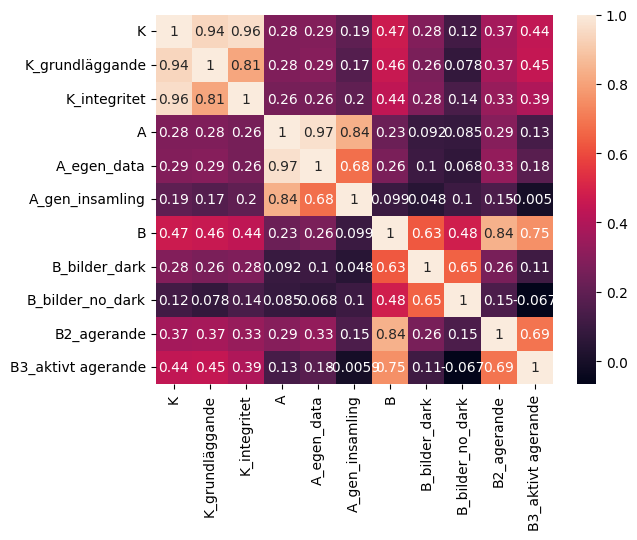

In [342]:
df_number = df_resp_sum.select_dtypes(include='number')
matrix = df_number.corr()
sns.heatmap(matrix,annot=True)
plt

<h1>Medelvärde av kategorier</h1>

<h1>Reliabilitetstest</h1>

In [343]:
def cronbach_alpha(df):
  k = df.shape[1]
  varians_total = df.sum(axis=1).var(ddof=1)
  varians_frågor = df.var(axis=0,ddof=1).sum()

  alpha = (k / (k - 1)) * (1 - varians_frågor / varians_total)

  return round(alpha, 3)

In [344]:
k_rel = cronbach_alpha(utvalda_k)
k1_rel = cronbach_alpha(utvalda_k1)
k2_rel = cronbach_alpha(utvalda_k2)

a_rel = cronbach_alpha(utvalda_a)
a1_rel = cronbach_alpha(utvalda_a1)
a2_rel = cronbach_alpha(utvalda_a2)

b_rel = cronbach_alpha(utvalda_b)
b1_dark_rel = cronbach_alpha(utvalda_b1_dark)
b1_no_dark_rel = cronbach_alpha(utvalda_b1_no_dark)
b2_rel = cronbach_alpha(utvalda_b2)
b3_rel = cronbach_alpha(utvalda_b3)

attityd = cronbach_alpha(df.iloc[:,29:])
beteende = cronbach_alpha(df.iloc[:, 6:17])
Beteende_bilder = cronbach_alpha(df.iloc[:, 11:17])
print("Kunskap =", k_rel, k1_rel, k2_rel, "attityd =", a_rel, a1_rel, a2_rel, "beteende =", b_rel, b1_dark_rel,b1_no_dark_rel,b2_rel,b3_rel)

Kunskap = 0.953 0.896 0.95 attityd = 0.914 0.92 0.674 beteende = 0.805 0.869 0.779 0.714 0.766


<h1>Korrelationstest</h1>

In [345]:
korrelation = df_resp_sum.iloc[:,4:].corr(method='pearson')

<module 'matplotlib.pyplot' from 'C:\\Users\\Stenh\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python313\\site-packages\\matplotlib\\pyplot.py'>

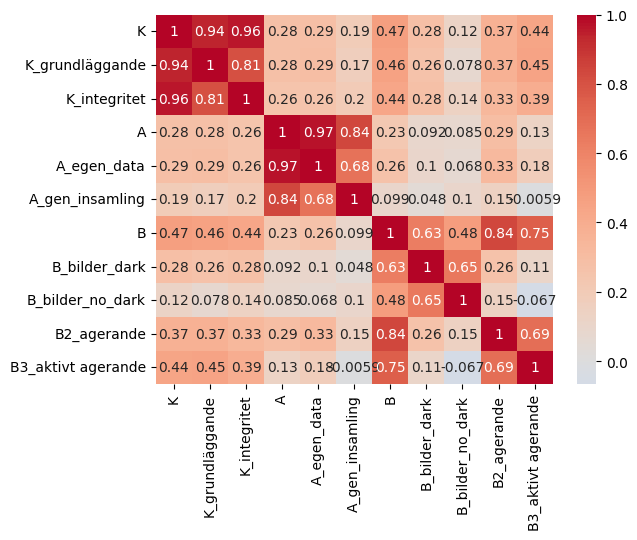

In [346]:
sns.heatmap(korrelation, annot=True, cmap='coolwarm', center=0)
plt

<h1>SEM</h1>

In [347]:
!pip install semopy

Defaulting to user installation because normal site-packages is not writeable


In [348]:
# 1. INSTALLERA nödvändiga paket först via terminal:
# pip install pandas semopy openpyxl

import pandas as pd
from semopy import Model, Optimizer
from semopy.inspector import inspect

# # 2. LÄS IN DIN CSV
# df = pd.read_csv("Undersökning om gymnasieelevers cookie-hantering (Svar) - Formulärsvar 1.csv")
# df.columns = df.columns.str.strip()

# 3. DEFINIERA KAB-GRUPPER baserat på index
behavior_cols = df.columns[5:17].tolist()
knowledge_cols = df.columns[17:29].tolist()
attitude_cols = df.columns[29:].tolist()

# 4. DÖP OM kolumner till enklare namn
rename_map = {}
for i, col in enumerate(knowledge_cols):
    rename_map[col] = f"K{i+1}"
for i, col in enumerate(attitude_cols):
    rename_map[col] = f"A{i+1}"
for i, col in enumerate(behavior_cols):
    rename_map[col] = f"B{i+1}"

df_clean = df.rename(columns=rename_map)

# 5. SKAPA MODELL i semopy-syntax
model_desc = f"""
Knowledge =~ {' + '.join(rename_map[c] for c in knowledge_cols)}
Attitude  =~ {' + '.join(rename_map[c] for c in attitude_cols)}
Behavior  =~ {' + '.join(rename_map[c] for c in behavior_cols)}

Attitude ~ Knowledge
Behavior ~ Attitude
"""

# 6. Rensa bort tomma rader för SEM
df_clean = df_clean.dropna(subset=rename_map.values())

# 7. BYGG OCH TRÄNA MODELLEN
model = Model(model_desc)
model.fit(df_clean)

# 8. VISA RESULTAT
results = inspect(model)
print("\n--- SEM Resultat (koefficienter & p-värden) ---")
print(results)





--- SEM Resultat (koefficienter & p-värden) ---
        lval  op       rval  Estimate  Std. Err   z-value   p-value
0   Attitude   ~  Knowledge  0.325823  0.112675  2.891708  0.003832
1   Behavior   ~   Attitude -0.039366  0.029707 -1.325151  0.185121
2         K1   ~  Knowledge  1.000000         -         -         -
3         K2   ~  Knowledge  1.372005   0.14144  9.700267       0.0
4         K3   ~  Knowledge  0.965666  0.135439  7.129904       0.0
..       ...  ..        ...       ...       ...       ...       ...
72        K5  ~~         K5  1.746795  0.223279  7.823386       0.0
73        K6  ~~         K6  0.899686  0.125688  7.158081       0.0
74        K7  ~~         K7  1.242341  0.168913  7.354898       0.0
75        K8  ~~         K8  0.773994  0.114036  6.787285       0.0
76        K9  ~~         K9  0.801137  0.118907  6.737519       0.0

[77 rows x 7 columns]


In [349]:
from semopy.inspector import inspect

# Hämta standardiserade värden
estimates = inspect(model)

# Räkna ut R² manuellt
def calculate_r2(est_df, dependent_var):
    effects = est_df[(est_df["op"] == "~") & (est_df["lval"] == dependent_var)]
    r2 = sum(effects["Estimate"]**2)
    return r2

dependent_vars = ["Attitude", "Behavior"]

print("\n--- R² för beroende latenta variabler ---")
for var in dependent_vars:
    r2_val = calculate_r2(estimates, var)
    print(f"{var}: {r2_val:.3f}")




--- R² för beroende latenta variabler ---
Attitude: 0.106
Behavior: 0.002


In [350]:
from semopy import semplot

# Skapa en PDF- eller PNG-bild av modellen
semplot(model, 'kab_model.png')  # eller .pdf
print("Modellen är sparad som kab_model.png")


Modellen är sparad som kab_model.png


<h1>T-test/ANOVA</h1>

***T-Test för grupper som känner till/ inte känner till GDPR***

-   Resultaten från t-testerna visar att det inte finns några statistiskt signifikanta skillnader i kunskap, attityd eller beteende mellan elever som rapporterar låg respektive hög kännedom om GDPR (p > 0.05). Detta tyder på att självupplevd GDPR-kännedom inte nödvändigtvis innebär en djupare förståelse för cookies, inte heller en mer integritetsmedveten attityd eller förändrat beteende. Resultatet kan ses i ljuset av den så kallade privacy paradox, där individer uttrycker oro för sin integritet men inte agerar i linje med denna oro. Det antyder att insatser som syftar till att öka medvetenheten om integritet behöver gå bortom ren informationsspridning och i stället fokusera på att öka faktisk förståelse och användarkompetens.

In [351]:
df_tTest = df_resp_sum.copy()

gdpr_kännedom = df.iloc[:, 31]

df_tTest['Integritet_online'] = gdpr_kännedom

låg_kännedom = df_tTest[df_tTest['Integritet_online'] < 4]
hög_kännedom = df_tTest[df_tTest['Integritet_online'] > 4]

from scipy.stats import ttest_ind

t_k = ttest_ind(hög_kännedom['K'], låg_kännedom['K'], nan_policy='omit')
t_a = ttest_ind(hög_kännedom['A'], låg_kännedom['A'], nan_policy='omit')
t_b = ttest_ind(hög_kännedom['B'], låg_kännedom['B'], nan_policy='omit')

print("📘 T-test: Kunskap (K)")
print(f"  t = {t_k.statistic:.3f}, p = {t_k.pvalue:.4f}")

print("📗 T-test: Attityd (A)")
print(f"  t = {t_a.statistic:.3f}, p = {t_a.pvalue:.4f}")

print("📙 T-test: Beteende (B)")
print(f"  t = {t_b.statistic:.3f}, p = {t_b.pvalue:.4f}")




📘 T-test: Kunskap (K)
  t = 4.043, p = 0.0001
📗 T-test: Attityd (A)
  t = 7.109, p = 0.0000
📙 T-test: Beteende (B)
  t = 3.071, p = 0.0027


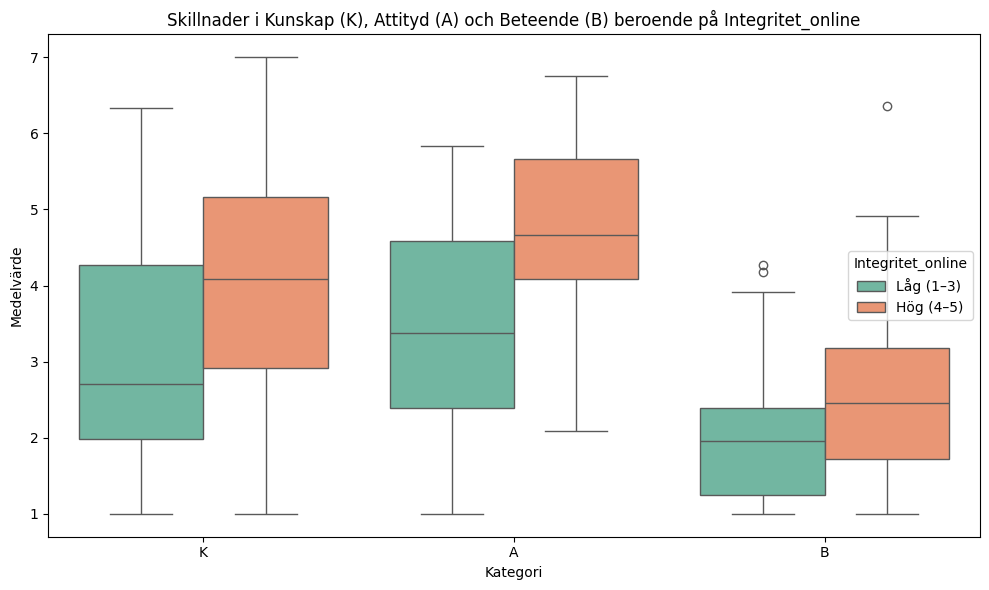

In [352]:
df_tTest['Integritet_online_grupp'] = df_tTest['Integritet_online'].apply(
    lambda x: 'Låg (1–3)' if x < 4 else 'Hög (4–5)'
)

df_melted = df_tTest.melt(id_vars="Integritet_online_grupp", value_vars=["K", "A", "B"],
                          var_name="Kategori", value_name="Värde")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x="Kategori", y="Värde", hue="Integritet_online_grupp", palette="Set2")
plt.title("Skillnader i Kunskap (K), Attityd (A) och Beteende (B) beroende på Integritet_online")
plt.ylabel("Medelvärde")
plt.xlabel("Kategori")
plt.legend(title="Integritet_online")
plt.tight_layout()
plt.show()



***T-TEst för skillnad mellan kön***

Resultaten från t-tester visar att det finns en statistiskt signifikant könsskillnad i både kunskapsnivå och beteende kopplat till cookies, men inte i attityd. Män och kvinnor skiljer sig alltså i hur mycket de vet om cookies, samt hur de agerar i praktiken (t.ex. raderar cookies eller blockerar spårning), men har en liknande inställning till datainsamling. Det antyder att kön kan vara en relevant faktor vid utformning av informationsinsatser, särskilt om målet är att öka faktisk förståelse eller förändra beteende. Att attityden däremot inte skiljer sig kan tyda på att både män och kvinnor i liknande grad värderar digital integritet, men att de omsätter den i handling på olika sätt.

In [353]:
from scipy.stats import ttest_ind

# Lägg till kön i df_resp_sum (index 1 = könskolumn i ursprunglig df)


# Skapa två grupper
kvinnor = df_resp_sum[df_resp_sum['Kön'] == 'Kvinna']
män = df_resp_sum[df_resp_sum['Kön'] == 'Man']

# Kör t-tester för K, A, B
t_k = ttest_ind(kvinnor['K'], män['K'], nan_policy='omit')
t_a = ttest_ind(kvinnor['A'], män['A'], nan_policy='omit')
t_b = ttest_ind(kvinnor['B'], män['B'], nan_policy='omit')

# Visa resultat
print("📘 T-test: Kunskap (Könsskillnad)")
print(f"  t = {t_k.statistic:.3f}, p = {t_k.pvalue:.4f}")

print("📗 T-test: Attityd (Könsskillnad)")
print(f"  t = {t_a.statistic:.3f}, p = {t_a.pvalue:.4f}")

print("📙 T-test: Beteende (Könsskillnad)")
print(f"  t = {t_b.statistic:.3f}, p = {t_b.pvalue:.4f}")


📘 T-test: Kunskap (Könsskillnad)
  t = -2.573, p = 0.0112
📗 T-test: Attityd (Könsskillnad)
  t = 1.530, p = 0.1284
📙 T-test: Beteende (Könsskillnad)
  t = -2.536, p = 0.0124


In [354]:
print(kvinnor['B'].mean(), män['B'].mean())

2.049090909090909 2.5177383592017737


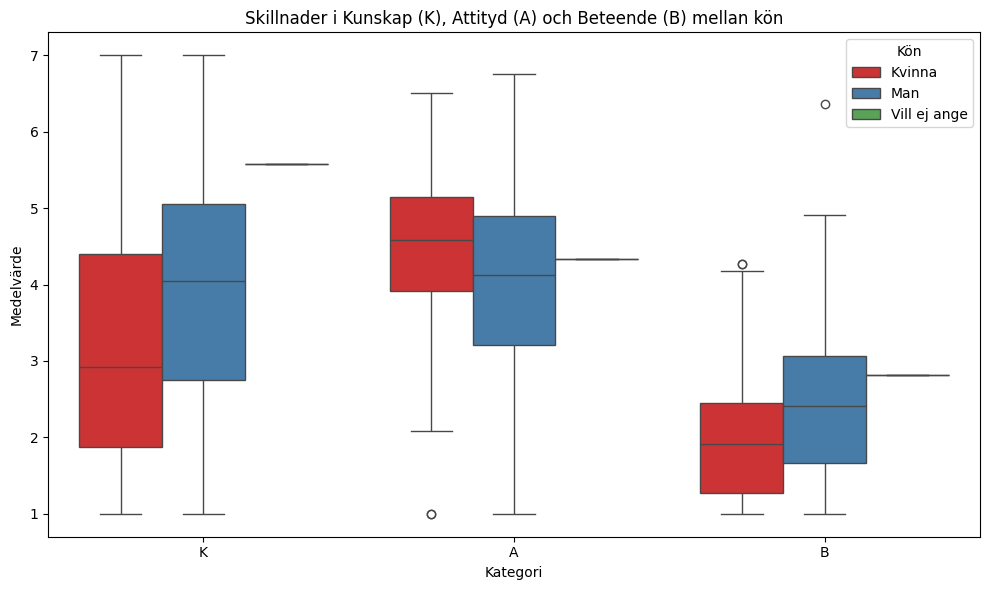

In [355]:
# Gör om till långform för seaborn
df_melted = df_resp_sum.melt(id_vars="Kön", value_vars=["K", "A", "B"], 
                             var_name="Kategori", value_name="Värde")

# Rita boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x="Kategori", y="Värde", hue="Kön", palette="Set1")
plt.title("Skillnader i Kunskap (K), Attityd (A) och Beteende (B) mellan kön")
plt.ylabel("Medelvärde")
plt.xlabel("Kategori")
plt.legend(title="Kön")
plt.tight_layout()
plt.show()

In [356]:
from scipy.stats import ttest_rel

# Exempel – byt till dina faktiska kolumnnamn!
t_stat, p_value = ttest_rel(df_resp_sum['B_bilder_no_dark'], df_resp_sum['B_bilder_dark'])

print("📊 Parat t-test – benägenhet att neka cookies")
print(f"  t = {t_stat:.3f}, p = {p_value:.4f}")


📊 Parat t-test – benägenhet att neka cookies
  t = 3.045, p = 0.0028


C:\Users\Stenh\AppData\Local\Temp\ipykernel_12300\3881499562.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_melted, x="Typ av notis", y="Svar", palette="Set2", ci="sd")
C:\Users\Stenh\AppData\Local\Temp\ipykernel_12300\3881499562.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_melted, x="Typ av notis", y="Svar", palette="Set2", ci="sd")


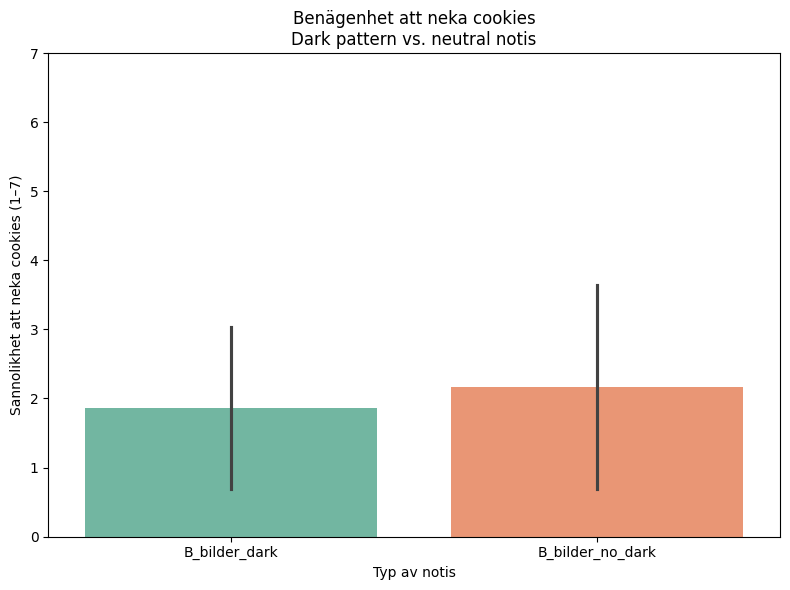

In [357]:
# Smält till lång format för seaborn
df_melted = df_resp_sum.melt(value_vars=["B_bilder_dark", "B_bilder_no_dark"],
                           var_name="Typ av notis", value_name="Svar")

# Rita barplot med medelvärden
plt.figure(figsize=(8, 6))
sns.barplot(data=df_melted, x="Typ av notis", y="Svar", palette="Set2", ci="sd")
plt.title("Benägenhet att neka cookies\nDark pattern vs. neutral notis")
plt.ylabel("Sannolikhet att neka cookies (1–7)")
plt.xlabel("Typ av notis")
plt.ylim(0, 7)
plt.tight_layout()
plt.show()

In [358]:
df_resp_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Kön                 133 non-null    category
 1   Årskurs             133 non-null    category
 2   Program             133 non-null    category
 3   Invånare            133 non-null    category
 4   K                   133 non-null    float64 
 5   K_grundläggande     133 non-null    float64 
 6   K_integritet        133 non-null    float64 
 7   A                   133 non-null    float64 
 8   A_egen_data         133 non-null    float64 
 9   A_gen_insamling     133 non-null    float64 
 10  B                   133 non-null    float64 
 11  B_bilder_dark       133 non-null    float64 
 12  B_bilder_no_dark    133 non-null    float64 
 13  B2_agerande         133 non-null    float64 
 14  B3_aktivt agerande  133 non-null    float64 
dtypes: category(4), float64(11)
memory usage

<h1>T-TEST KÖN<h1>

In [359]:
from scipy.stats import ttest_ind

# Dela upp datan baserat på kön
kvinnor = df_resp_sum[df_resp_sum["Kön"] == "Kvinna"]["K"]
män = df_resp_sum[df_resp_sum["Kön"] == "Man"]["K"]

# T-test (standard: equal_var=True antar lika varians)
t_stat, p_val = ttest_ind(kvinnor, män, equal_var=False)  # Welch's t-test (säkrare)

print(f"T-statistik: {t_stat:.3f}")
print(f"P-värde: {p_val:.3f}")


T-statistik: -2.569
P-värde: 0.012


In [360]:
from scipy.stats import ttest_ind

# Dela upp datan baserat på kön
kvinnor = df_resp_sum[df_resp_sum["Kön"] == "Kvinna"]["A"]
män = df_resp_sum[df_resp_sum["Kön"] == "Man"]["A"]

# T-test (standard: equal_var=True antar lika varians)
t_stat, p_val = ttest_ind(kvinnor, män, equal_var=False)  # Welch's t-test (säkrare)

print(f"T-statistik: {t_stat:.3f}")
print(f"P-värde: {p_val:.3f}")

T-statistik: 1.548
P-värde: 0.125


In [361]:
from scipy.stats import ttest_ind

# Dela upp datan baserat på kön
kvinnor = df_resp_sum[df_resp_sum["Kön"] == "Kvinna"]["B"]
män = df_resp_sum[df_resp_sum["Kön"] == "Man"]["B"]

# T-test (standard: equal_var=True antar lika varians)
t_stat, p_val = ttest_ind(kvinnor, män, equal_var=False)  # Welch's t-test (säkrare)

print(f"T-statistik: {t_stat:.3f}")
print(f"P-värde: {p_val:.3f}")

T-statistik: -2.634
P-värde: 0.010


<h1>T-TEST ÅRSKURS<h1>

In [362]:
df_resp_sum.head()

,Kön,Årskurs,Program,Invånare,K,K_grundläggande,K_integritet,A,A_egen_data,A_gen_insamling,B,B_bilder_dark,B_bilder_no_dark,B2_agerande,B3_aktivt agerande
0,Man,Årskurs 3,Naturvetenskap,medel,3.25,1.833333,4.666667,5.833333,5.500,6.50,2.181818,1.000000,3.5,3.666667,1.0
1,Man,Årskurs 3,Samhällsvetenskap,medel,1.58,2.166667,1.000000,4.666667,4.625,4.75,1.545455,1.000000,2.0,2.333333,1.0
2,Kvinna,Årskurs 3,Naturvetenskap,liten,1.67,2.333333,1.000000,5.916667,6.000,5.75,1.363636,1.000000,1.0,2.333333,1.0
3,Kvinna,Årskurs 3,Samhällsvetenskap,liten,2.33,1.166667,3.500000,4.833333,4.375,5.75,1.000000,1.000000,1.0,1.000000,1.0
4,Kvinna,Årskurs 3,Naturvetenskap,liten,5.08,4.666667,5.500000,4.416667,4.250,4.75,2.727273,1.666667,2.0,4.000000,3.0


In [363]:
from scipy.stats import ttest_ind

# Filtrera ut elever i årskurs 1 och 2
år1 = df_resp_sum[df_resp_sum["Årskurs"] == "Årskurs 1"]["K"]
år2 = df_resp_sum[df_resp_sum["Årskurs"] == "Årskurs 3"]["K"]

# T-test
t_stat, p_val = ttest_ind(år1, år2, equal_var=False)  # Welch's t-test

print(f"T-statistik: {t_stat:.3f}")
print(f"P-värde: {p_val:.3f}")

T-statistik: 1.830
P-värde: 0.071


In [364]:
from scipy.stats import ttest_ind

# Filtrera ut elever i årskurs 1 och 2
år1 = df_resp_sum[df_resp_sum["Årskurs"] == "Årskurs 1"]["A"]
år2 = df_resp_sum[df_resp_sum["Årskurs"] == "Årskurs 3"]["A"]

# T-test
t_stat, p_val = ttest_ind(år1, år2, equal_var=False)  # Welch's t-test

print(f"T-statistik: {t_stat:.3f}")
print(f"P-värde: {p_val:.3f}")

T-statistik: -1.829
P-värde: 0.071


In [365]:
from scipy.stats import ttest_ind

# Filtrera ut elever i årskurs 1 och 2
år1 = df_resp_sum[df_resp_sum["Årskurs"] == "Årskurs 1"]["B"]
år2 = df_resp_sum[df_resp_sum["Årskurs"] == "Årskurs 3"]["B"]

# T-test
t_stat, p_val = ttest_ind(år1, år2, equal_var=False)  # Welch's t-test

print(f"T-statistik: {t_stat:.3f}")
print(f"P-värde: {p_val:.3f}")

T-statistik: 1.327
P-värde: 0.188


<h1>MEDELVÄRDE<h1>

In [366]:
df_kategoriserad

,K,K_grundläggande,K_integritet,A,A_egen_data,A_gen_insamling,B,B_bilder_dark,B_bilder_no_dark,B2_agerande,B3_aktivt agerande
0,3.711153,3.552632,3.869674,4.224937,4.084586,4.505639,2.343814,1.859649,2.161654,2.897243,2.39599


In [367]:
# Gruppera först som vanligt
medel_per_årskurs_kön = df_resp_sum.groupby(['Årskurs', 'Kön'])[['K']].mean()

# Gör om kön till kolumner
tabell_K = medel_per_årskurs_kön.unstack('Kön')

# Platta kolumnindex för tydlighet
tabell_K.columns = [f"{col[0]} - {col[1]}" for col in tabell_K.columns]

# Visa tabellen
print(tabell_K)

           K - Kvinna   K - Man  K - Vill ej ange
Årskurs                                          
Årskurs 1    3.250556  4.071864               NaN
Årskurs 2    4.155000  3.545556              5.58
Årskurs 3    3.000000  3.886429               NaN


C:\Users\Stenh\AppData\Local\Temp\ipykernel_12300\1890733522.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medel_per_årskurs_kön = df_resp_sum.groupby(['Årskurs', 'Kön'])[['K']].mean()


In [368]:
utvalda_k1.describe()

,Jag har god kunskap om cookies.,Jag känner till vad cookies används till.,Jag vet skillnaden mellan nödvändiga och icke-nödvändiga cookies.,Jag vet att det går att anpassa eller neka cookies när jag besöker en ny webbplats.,Jag känner till att cookies används för grundläggande funktioner på en hemsida.,Jag känner till att cookies används för öka användarupplevelsen på en hemsida.
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,2.879699,3.526316,2.744361,4.661654,3.661654,3.842105
std,1.581319,1.885266,1.782296,2.218678,1.945808,2.006966
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000
50%,3.000000,3.000000,2.000000,5.000000,4.000000,4.000000
75%,4.000000,5.000000,4.000000,7.000000,5.000000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [369]:
utvalda_k2.describe()

,Jag känner till att cookies kan lagra personliga uppgifter som jag lämnat på en webbplats.,Jag vet att cookies kan användas för att samla in information om mitt beteende online.,Jag är medveten om att cookies kan användas för att bygga en profil av mig som internetanvändare.,Jag känner till att cookies kan fortsätta spåra mitt beteende när jag besöker andra hemsidor.,Jag vet att cookies kan påverka hur mycket reklam jag ser och vilken typ av reklam jag får.,Jag känner till att cookies som innehåller personlig information om mig och kan säljas vidare till andra företag.
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,4.105263,4.067669,3.924812,3.473684,4.150376,3.496241
std,2.171660,2.111281,2.179881,2.200478,2.261322,2.193738
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,6.000000,6.000000,6.000000,5.000000,6.000000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [370]:
# Gruppera först som vanligt
medel_per_årskurs_kön = df_resp_sum.groupby(['Årskurs', 'Kön'])[['A']].mean()

# Gör om kön till kolumner
tabell_A = medel_per_årskurs_kön.unstack('Kön')

# Platta kolumnindex för tydlighet
tabell_A.columns = [f"{col[0]} - {col[1]}" for col in tabell_A.columns]

# Visa tabellen
print(tabell_A)



           A - Kvinna   A - Man  A - Vill ej ange
Årskurs                                          
Årskurs 1    4.337963  4.087571               NaN
Årskurs 2    4.208333  3.240741          4.333333
Årskurs 3    4.586538  4.619048               NaN


C:\Users\Stenh\AppData\Local\Temp\ipykernel_12300\1293533543.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medel_per_årskurs_kön = df_resp_sum.groupby(['Årskurs', 'Kön'])[['A']].mean()


In [377]:
df_kategoriserad.describe()

,K,K_grundläggande,K_integritet,A,A_egen_data,A_gen_insamling,B,B_bilder_dark,B_bilder_no_dark,B2_agerande,B3_aktivt agerande
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
mean,3.711153,3.552632,3.869674,4.224937,4.084586,4.505639,2.343814,1.859649,2.161654,2.897243,2.39599
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.711153,3.552632,3.869674,4.224937,4.084586,4.505639,2.343814,1.859649,2.161654,2.897243,2.39599
25%,3.711153,3.552632,3.869674,4.224937,4.084586,4.505639,2.343814,1.859649,2.161654,2.897243,2.39599
50%,3.711153,3.552632,3.869674,4.224937,4.084586,4.505639,2.343814,1.859649,2.161654,2.897243,2.39599
75%,3.711153,3.552632,3.869674,4.224937,4.084586,4.505639,2.343814,1.859649,2.161654,2.897243,2.39599
max,3.711153,3.552632,3.869674,4.224937,4.084586,4.505639,2.343814,1.859649,2.161654,2.897243,2.39599


In [372]:
utvalda_a1.describe()

,Jag bryr mig om att hemsidor hanterar mina personuppgifter på ett ansvarsfullt sätt.,Jag värnar om min personliga integritet online.,Jag är omsorgsfull med vilka uppgifter jag lämnar till hemsidor.,Jag bryr mig om att företag samlar in information om mig som person.,Jag bryr mig om att företag samlar in information om mitt beteende online.,Jag känner oro över att information som samlas in via cookies kan användas på ett felaktigt sätt.,Jag känner mig obekväm med att webbplatser spårar mitt beteende med hjälp av cookies.,När jag besöker en hemsida tycker att det är viktigt att jag får välja vilken information om mig som lagras.
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.00000,133.000000,133.000000
mean,4.639098,4.443609,4.082707,4.203008,4.067669,3.62406,3.601504,4.015038
std,1.896322,1.768468,1.753979,1.921802,1.818239,1.88937,1.850225,2.037471
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,2.000000
50%,5.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000
75%,6.000000,6.000000,5.000000,6.000000,5.000000,5.00000,5.000000,6.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000


In [373]:
utvalda_a2.describe()

,Jag tycker att hemsidor bör förklara tydligt vad varje cookie används till.,Jag tycker att det är fel att samla in personuppgifter utan att informera användaren.,Jag tycker att företag inskränker på människors privatliv när de spårar aktivitet via cookies.,Jag tycker att det är rimligt att betala med personlig data istället för pengar för att använda tjänster online.
count,133.000000,133.000000,133.000000,133.000000
mean,4.729323,5.308271,4.473684,3.511278
std,2.015575,1.838892,1.909224,1.635851
min,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,3.000000,2.000000
50%,5.000000,6.000000,4.000000,4.000000
75%,7.000000,7.000000,6.000000,5.000000
max,7.000000,7.000000,7.000000,6.000000


In [374]:
df["Vilken årskurs går du i?"].value_counts()

Vilken årskurs går du i?
Årskurs 1    77
Årskurs 3    40
Årskurs 2    16
Name: count, dtype: int64

In [375]:
# Gruppera först som vanligt
medel_per_årskurs_kön = df_resp_sum.groupby(['Årskurs', 'Kön'])[['B']].mean()

# Gör om kön till kolumner
tabell_B = medel_per_årskurs_kön.unstack('Kön')

# Platta kolumnindex för tydlighet
tabell_A.columns = [f"{col[0]} - {col[1]}" for col in tabell_B.columns]

# Visa tabellen
print(tabell_B)

                  B                       
Kön          Kvinna       Man Vill ej ange
Årskurs                                   
Årskurs 1  1.984848  2.573190          NaN
Årskurs 2  2.348485  2.333333     2.818182
Årskurs 3  2.024476  2.402597          NaN


C:\Users\Stenh\AppData\Local\Temp\ipykernel_12300\238364228.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medel_per_årskurs_kön = df_resp_sum.groupby(['Årskurs', 'Kön'])[['B']].mean()


In [376]:
df_resp_sum.head()

,Kön,Årskurs,Program,Invånare,K,K_grundläggande,K_integritet,A,A_egen_data,A_gen_insamling,B,B_bilder_dark,B_bilder_no_dark,B2_agerande,B3_aktivt agerande
0,Man,Årskurs 3,Naturvetenskap,medel,3.25,1.833333,4.666667,5.833333,5.500,6.50,2.181818,1.000000,3.5,3.666667,1.0
1,Man,Årskurs 3,Samhällsvetenskap,medel,1.58,2.166667,1.000000,4.666667,4.625,4.75,1.545455,1.000000,2.0,2.333333,1.0
2,Kvinna,Årskurs 3,Naturvetenskap,liten,1.67,2.333333,1.000000,5.916667,6.000,5.75,1.363636,1.000000,1.0,2.333333,1.0
3,Kvinna,Årskurs 3,Samhällsvetenskap,liten,2.33,1.166667,3.500000,4.833333,4.375,5.75,1.000000,1.000000,1.0,1.000000,1.0
4,Kvinna,Årskurs 3,Naturvetenskap,liten,5.08,4.666667,5.500000,4.416667,4.250,4.75,2.727273,1.666667,2.0,4.000000,3.0
